# Predicting Housing Prices with Linear Regression

The solution for the least squares $\mathbf{w}$ in linear regression is given by:

$$
\mathbf{w}=(X^\top X)^{-1}X^\top\mathbf{y}
$$

So, why do gradient descent? Sometimes, just doing GD is faster than finding the closed form solution above.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

np.random.seed(0)

X, y = load_boston(return_X_y=True)

Xdf = pd.DataFrame(X)
Xdf.columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT'
]
Xdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The features of this dataset are:

Feature|Description
 ---:| :--- 
CRIM |    per capita crime rate by town
ZN   |    proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS |   proportion of non-retail business acres per town
CHAS   |  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX    | nitric oxides concentration (parts per 10 million)
RM    |   average number of rooms per dwelling
AGE   |   proportion of owner-occupied units built prior to 1940
DIS    |  weighted distances to five Boston employment centres
RAD    |  index of accessibility to radial highways
TAX     | full-value property-tax rate per \$10,000
PTRATIO | pupil-teacher ratio by town
B      |  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT  |  % lower status of the population

and the labels are the median value of owner-occupied homes, in \$1000's

Let's normalize the data, so that it behaves nicely, and we converge faster.

In [11]:
idx = np.random.permutation(X.shape[0])
j = int(X.shape[0] * 0.8) 

# will need th un-normalized versions later
Xtr_pre, ytr_pre = X[idx[:j]], y[idx[:j]]
Xte_pre, yte_pre = X[idx[j:]], y[idx[j:]]

m = np.mean(X, axis=0)
s = np.std(X, axis=0)
    
X_n = (X - m) / s
y_n = (y - np.mean(y)) / np.std(y)

Xtr, ytr = X_n[idx[:j]], y_n[idx[:j]]
Xte, yte = X_n[idx[j:]], y_n[idx[j:]]

### Implementation: Helper functions
1. `mean_squared_error(X, y, w)` calculates the MSE based on training matrix $X$, labels $\mathbf{y}$ and feature weights $\mathbf{w}$
3. `loss_plotter` plot the **MSE vs. iteration**

In [12]:
# Mean squared error from residual
# Square all residuals, sum them up, and take the mean
def mse_from_e(residual):
    squares = np.square(residual)
    summed = np.sum(squares)
    return summed / len(residual)

# Mean Squared Error of X.w - y
# Calculate Xy - w, and use mse_from_e to find error 
def mean_squared_error(X, y, w):
    e = np.dot(X,w) - y
    return mse_from_e(e)

# Plot loss as a function of epoch
def loss_plotter(vlist, fname):
    plt.plot(range(1, 1+len(vlist)), vlist,
           linewidth=2, linestyle='-', marker='o')
    plt.legend(('Loss'))
    plt.grid()
    xt = np.arange(0, len(vlist), 10)
    _ = plt.xticks(xt)
    _ = plt.xlabel('Iteration', fontsize=14)
    _ = plt.ylabel(fname, fontsize=14)
    _ = plt.title(fname)
    plt.show()
    return

### Gradient Descent for GLMs - Linear Regression

For linear regression, $z_i=\mathbf{x_i}\cdot\mathbf{w}$, $h(z_i)=z_i$ and $\mathcal{l}_i(y_i, \hat{y}_i)=(y_i-\hat{y}_i)^2$. So,

$$\nabla_\mathbf{w}\mathcal{L}=\frac{1}{n}\sum_{i=1}^n \mathcal{l}'(y_i, \hat{y}_i)h'(z_i)\nabla_\mathbf{w}{z_i}
=\frac{2}{n}\sum_{i=1}^n (\hat{y}_i-y_i)\mathbf{x_i}$$

In [13]:
def gradient(X, w, y):
    n, d = X.shape
    
    y_hat = np.dot(X, w).reshape(n)
    e = y_hat - y
    
    weighted_sum_xi = e[0] * X[0,]
    
    for i in range (1, n):
        weighted_sum_xi += e[i] * X[i,]
        
    return 2/n * weighted_sum_xi.reshape(d,1)

### Gradient Descent Algorithm
Use $\mathbf{w}_{t+1}\leftarrow\mathbf{w}_t - \frac{1}{\sqrt{t}}\nabla_\mathbf{w}\mathcal{L}(\mathbf{w_t})$  find a suitable $\mathbf{w}$

644.337413480026


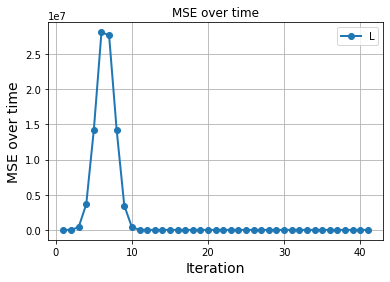

In [14]:
# ---------------- Main for linear regression using Gradient Descent --------------
n, d = Xtr.shape
T = 40

w = np.zeros((d,1))
mse_list = [mean_squared_error(Xtr, ytr, w)]

for t in range(1, T+1):
    w -= 1 / t * gradient(Xtr, w, ytr)
    mse_list.append(mean_squared_error(Xtr, ytr, w))

print(mse_list[-1])
loss_plotter(mse_list, 'MSE over time')

Seemingly, the spike in mean squared error happens because the learning rate is very sensitve

Let's "unnormalize" the predicted prices, and compare them to the real results 

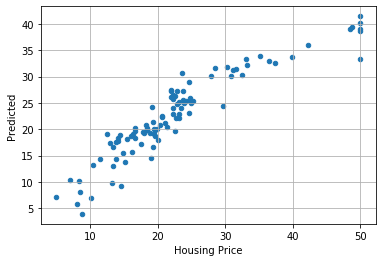

In [15]:
# Unnormalizing w.r.t to the training set's mean and standard deviation
y_final = (np.dot(Xte, w) * np.std(ytr_pre) + np.mean(ytr_pre)).reshape(len(yte_pre))

# Plotting the reuslts
results = pd.DataFrame({'Housing Price':yte_pre, 'Predicted': y_final})
results.plot(kind='scatter', x='Housing Price', y='Predicted')
plt.grid()

And the first predictions:

In [16]:
results.head(10)

,Housing Price,Predicted
0,20.7,22.251575
1,39.8,33.679540
2,17.8,19.472144
3,19.6,19.901033
4,14.9,15.485360
5,22.0,26.151544
6,48.8,39.358578
7,25.0,25.413788
8,48.5,39.099549
9,23.9,24.973350
